In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') # deaktiviert Warnungen 
%matplotlib inline

In [2]:
from Modell.m_single import Platte as pl
from Modell.m_single import Kugel as kl

### **Frequency Response Modell**
+ Parameter:
    + **delta: charakristische Funktion**
    + **eta: Parameter in der Frequency Response zur Substitution**
    + **omega: Winkelfrequenz [1/s]**
    + **gamma: ein Maß für die Nichtisothermie des Adsorbat-Adsorbens-Systems**
    + **K_omega: relative Gleichgewichtskonstante der Konzentration in den Speicherporen im Verhältnis zu den Transportporen**
    + **f: Frequenz [1/s]**
    + **t_D: Diffusionszeit r^2(L^2)/D [s]**
    + **t_h: Zeitkonstante für den Wärmeaustausch zwischen dem Adsorptionsmittel und seiner Umgebung [s]**
    + **t_R: Zeitkonstante für den Massenaustausch zwischen den beiden Porensorten [s]**
    + **a: Kugelradius [m]**
    + **m: Probenmasse [kg]**
    + **der Anstieg der Isothermen im Gleichgewicht**
    + **L: Dicke von der ebenen Platte [m]**
    + **D: Diffusionskoeffizient [m^2/s]**
    + **R: Gaskonstante = 8.314 J/molK**
    + **T_0: Versuchstemperatur [K]**
    + **V_0: Ausgangsvolumen [m^3]**
+ Index:
    + 0: Ausgangsdaten
    + **1: Platte, der Index „1“ steht für die 1-dimensionale Betrachtung**
    + **3: Kugel, der Index „3“ steht für die 1-dimensionale Betrachtung**
    + **c: in-phase**
    + **s: out-of-phase**

### **1. Vergleich der in-phase und out-of-phase Funktion von Platte- und Kugelmodell**
+ **Initialisieren (Song und Rees 2008, )**
    + **Ebene Platte:**
        + **Dicke von der Platte: L = 10 µm**
        + **Diffusionskoeffizient D = 10^(-11) m^2/s**
        + **K = 1**
    + **Kugel:** 
        + **Partikeldurchmesser 2a = 20 µm**
        + **Diffusionskoeffizient D = 10^(-11) m^2/s**
        + **K = 1**

In [3]:
# die Funktion beschreibt die Verläufe der In-phase und out-of-phase charakteristischen Funktionen von Platten- und Kugelmodell
# enthält 5 Parameter von den beiden Modellen
def th_in_out_1(L, a, D, f, K=1):
    labels = ['Platte, in-phase', 'Kugel, in-phase', 'Platte, out-of-phase', 'Kugel, out-of-phase']
    colors = ['r', 'g', 'r', 'g']
    linestyle = ['-', '-', '--', '--']
    # Gibt die Größe des Bilds an
    plt.figure(figsize = (12,8))
    
    # Initialisieren 
    x, platte, kugel = [f, pl(L, D, f, K), kl(a, D, f, K)]
    # Ruft die Methode von zwei Klassen
    y = [platte.func_chara_1c(), kugel.func_chara_3c(), platte.func_chara_1s(), kugel.func_chara_3s()]
    
    # Gibt den Namen des Parameters und die Linienfarbe und -breite usw. an und zeichnen
    # Rot:Ebene Platte, Grün:Kugel
    for i in range(4):
        plt.plot(x, y[i], label = labels[i], linestyle = linestyle[i], linewidth = 2, color=colors[i])
    
    # Gibt die Ausdehnung der Achsen an.
    plt.xlim(0.001,10), plt.ylim(0,1)
    
    # Die x-Achse nimmt eine nichtlineare Koordinatenachse bzw. die logarithmische Achse an 
    plt.xscale('log'), plt.yscale('linear')
    
    # Fügt den Achsen Koordinaten hinzu
    plt.xticks([10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2], [0.001,0.01,0.1,1,10,100], rotation = 0, fontsize = 14, y = -0.01)
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], rotation = 0, fontsize = 14, x = -0.01)
    
    # Benennen die Achsen und das gesamte Bild
    plt.ylabel('charakteristische Funktion K∙δ', fontsize = 16, labelpad = 15)
    plt.xlabel('Frequenz[Hz]', fontsize = 16, labelpad = 10)
    plt.title("Verläufe der In-phase und out-of-phase charakteristischen Funktionen von Platten- und Kugelmodell",fontsize = 18, y = -0.2, color = 'b')
    
    plt.legend(loc = 1,fontsize = 15)
    plt.grid(True)

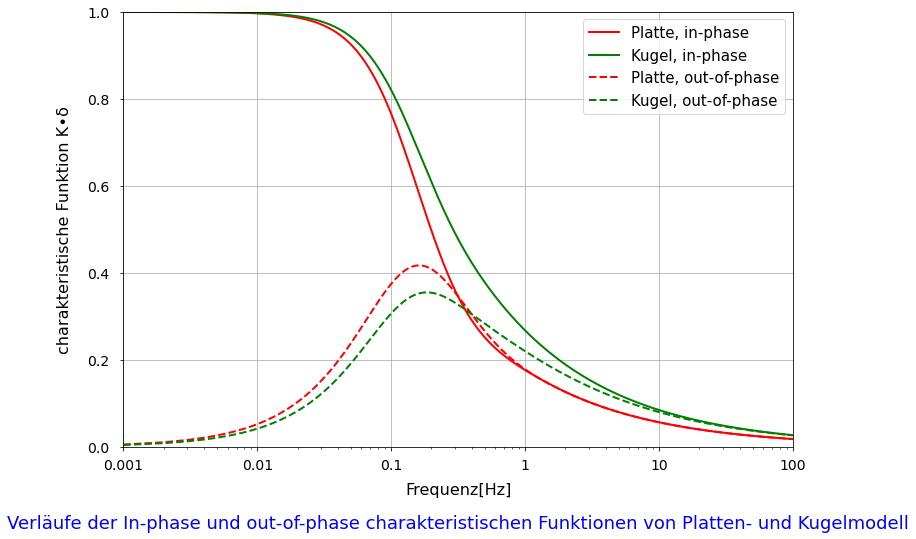

In [4]:
# Verwendet numpy, um eine Folge von 100.000 Zahlen mit einer gleichmäßigen Verteilung von 0,001 bis 10 zu generieren
np_f = np.linspace(start = 0.001, stop = 100, num = 100000)
# Ruft die Funktion th_in_out_1 auf und gibt Randbedingungen an
abb_in_out_1 = th_in_out_1(L = 1e-5, a = 1e-5, D = 1e-11, f = np_f)
abb_in_out_1

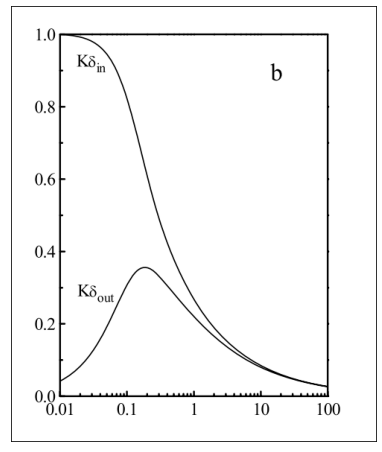

In [5]:
# Zeigen das Bild in der Literatur unter der gleichen Randbedingungen
li_1 = plt.imread('PNG/lt_1.png')
plt.figure(figsize = (12,8))
plt.xticks([])
plt.yticks([])
plt.imshow(li_1)  

### **2. die charakteristische in-phase und out-of-phase Funktion von beiden Modellen abh. Diffusionskoeffizienten**
+ **Initialisieren**
    + **Ebene Platte:**
        + **Dicke von der Platte: L = 10^-6 m**
        + **Diffusionskoeffizienten D = [1.5∙10^(−16), 1.5∙10^(−14), 1.5∙10^(−12)] 𝑚^2/𝑠**
        + **K = 1**
    + **Kugel:** 
        + **Partikeldurchmesser 2a = 10^-6 m**
        + **Diffusionskoeffizienten D = [1.5∙10^(−16), 1.5∙10^(−14), 1.5∙10^(−12)] 𝑚^2/𝑠**
        + **K = 1**

#### **2.1 die charakteristische in-phase Funktion von beiden Modell abh. Diffusionskoeffizienten**

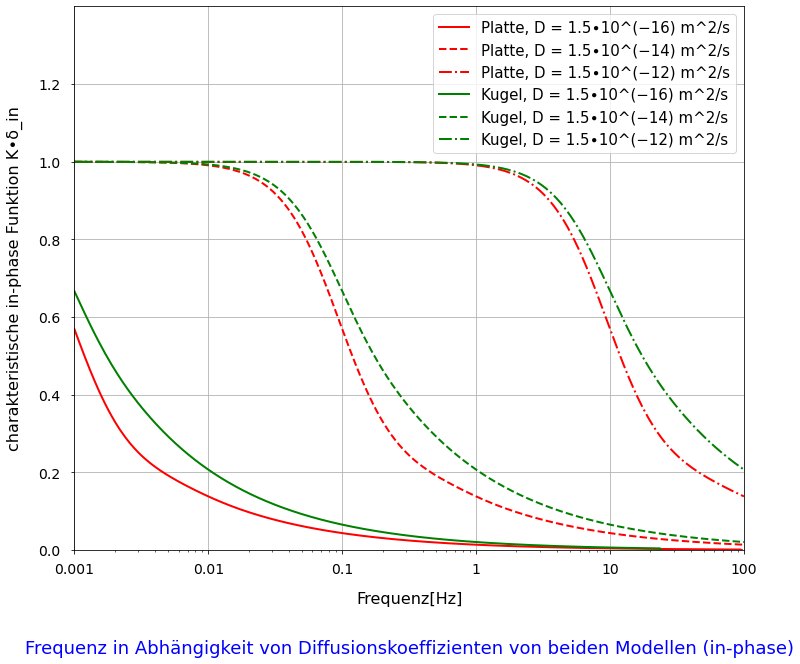

In [6]:
# die Funktion beschreibt Frequenz in Abhängigkeit von Diffusionskoeffizienten von beiden Modell (in-phase)
# Die Funktion erwartet eine Liste von Diffusionskoeffizientenwerten
def th_in_dk_1(a, list_D, f):
    labels = ['Platte, D = 1.5∙10^(−16) m^2/s', 'Platte, D = 1.5∙10^(−14) m^2/s', 'Platte, D = 1.5∙10^(−12) m^2/s',
              'Kugel, D = 1.5∙10^(−16) m^2/s', 'Kugel, D = 1.5∙10^(−14) m^2/s', 'Kugel, D = 1.5∙10^(−12) m^2/s']
    linestyle = ['-', '--', 'dashdot']
    plt.figure(figsize = (12,10))
    
    x = f
    # Variable definieren
    p, k, y = list(), list(), list()
    for i in range(3):
        # Initialisieren das Modell und zur Liste hinzufügen 
        p.append(pl(a, list_D[i], f, K = 1))
        # Ruft die Methode von der Klasse Platte
        y.append(p[i].func_chara_1c())
        # Diagramm zeichnen
        plt.plot(x, y[i], label = labels[i], linestyle = linestyle[i], linewidth = 2, color = 'r')
        
    for i in range(3):
        k.append(kl(a, list_D[i], f, K = 1))
        # Ruft die Methode von der Klasse Kugel
        y.append(k[i].func_chara_3c())
        plt.plot(x, y[i+3], label = labels[i+3], linestyle = linestyle[i], linewidth = 2, color = 'g')
    
    plt.xlim(0.001, 100), plt.ylim(0,1.4), plt.xscale('log'), plt.yscale('linear')
    plt.xticks([10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2], [0.001,0.01,0.1,1,10,100], rotation = 0, fontsize = 14, y = -0.01)
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2], rotation = 0, fontsize = 14, x = -0.01)
    
    plt.ylabel('charakteristische in-phase Funktion K∙δ_in', fontsize = 16, labelpad = 15)
    plt.xlabel('Frequenz[Hz]', fontsize = 16, labelpad = 15)
    plt.title("Frequenz in Abhängigkeit von Diffusionskoeffizienten von beiden Modellen (in-phase)",fontsize = 18, y = -0.2, color = 'b')
    
    plt.legend(loc = 1,fontsize = 15), plt.grid(True)
    
abb_in_dk = th_in_dk_1(a = 5e-7, list_D = [1.5e-16, 1.5e-14, 1.5e-12], f = np.linspace(0.001, 100, num = 1000000))
abb_in_dk

#### **2.2 die charakteristische out-of-phase Funktion von beiden Modell abh. Diffusionskoeffizienten**

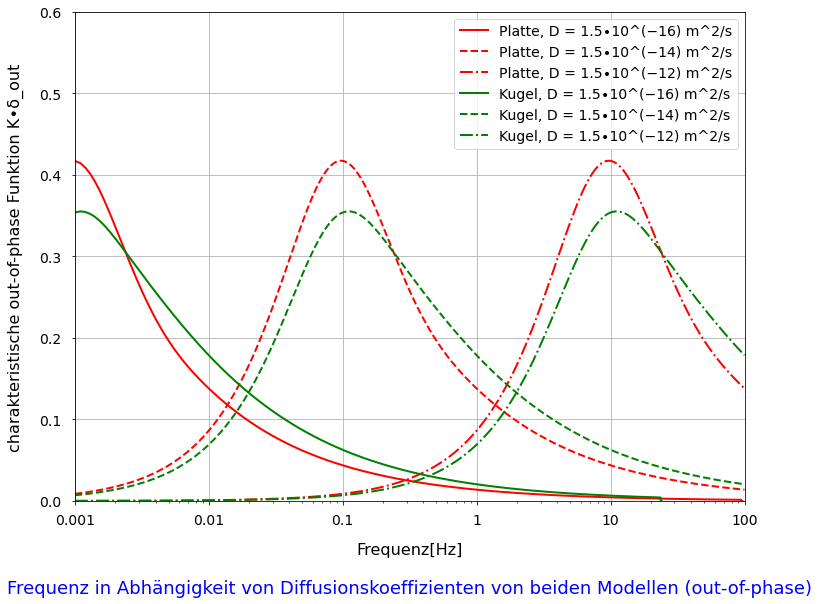

In [7]:
# die Funktion beschreibt Frequenz in Abhängigkeit von Diffusionskoeffizienten von beiden Modell (out-of-phase)
# Die Funktion erwartet eine Liste von Diffusionskoeffizientenwerten
def th_out_dk_1(a, list_D, f):
    labels = ['Platte, D = 1.5∙10^(−16) m^2/s', 'Platte, D = 1.5∙10^(−14) m^2/s', 'Platte, D = 1.5∙10^(−12) m^2/s',
              'Kugel, D = 1.5∙10^(−16) m^2/s', 'Kugel, D = 1.5∙10^(−14) m^2/s', 'Kugel, D = 1.5∙10^(−12) m^2/s']
    linestyle = ['-', '--', 'dashdot']
    plt.figure(figsize = (12,9))
    
    x = f
    p, k, y = list(), list(), list()
    for i in range(3):
        p.append(pl(a, list_D[i], f, K = 1))
        y.append(p[i].func_chara_1s())
        plt.plot(x, y[i], label = labels[i], linestyle = linestyle[i], linewidth = 2, color = 'r')
        
    for i in range(3):
        k.append(kl(a, list_D[i], f, K = 1))
        y.append(k[i].func_chara_3s())
        plt.plot(x, y[i+3], label = labels[i+3], linestyle = linestyle[i], linewidth = 2, color = 'g')
    
    plt.xlim(0.001, 100), plt.ylim(0,0.6), plt.xscale('log'), plt.yscale('linear')
    plt.xticks([10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2], [0.001,0.01,0.1,1,10,100], rotation = 0, fontsize = 14, y = -0.01)
    plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6], rotation = 0, fontsize = 14, x = -0.01)
    
    plt.ylabel('charakteristische out-of-phase Funktion K∙δ_out', fontsize = 16, labelpad = 15)
    plt.xlabel('Frequenz[Hz]', fontsize = 16, labelpad = 15)
    plt.title("Frequenz in Abhängigkeit von Diffusionskoeffizienten von beiden Modellen (out-of-phase)",fontsize = 18, y = -0.2, color = 'b')
    
    plt.legend(loc = 1,fontsize = 14), plt.grid(True)
    
abb_out_dk = th_out_dk_1(a = 5e-7, list_D = [1.5e-16, 1.5e-14, 1.5e-12], f = np.linspace(0.001, 100, num = 1000000))
abb_out_dk

### **3. die charakteristische in-phase und out-of-phase Funktion von beiden Modellen abh. Partikelgrößen**
+ **Initialisieren**
    + **Ebene Platte:**
        + **Dicke von der Platte: L = [10^(-7), 10^(-6), 10^(-5)] m**
        + **Diffusionskoeffizienten D = 1.5∙10^(−14) 𝑚^2/𝑠**
        + **K = 1**
    + **Kugel:** 
        + **Partikeldurchmesser 2a = [10^(-7), 10^(-6), 10^(-8)] m**
        + **Diffusionskoeffizienten D = 1.5∙10^(−14) 𝑚^2/𝑠**
        + **K = 1**

#### **3.1 die charakteristische in-phase Funktion von beiden Modellen abh. Partikelgrößen**

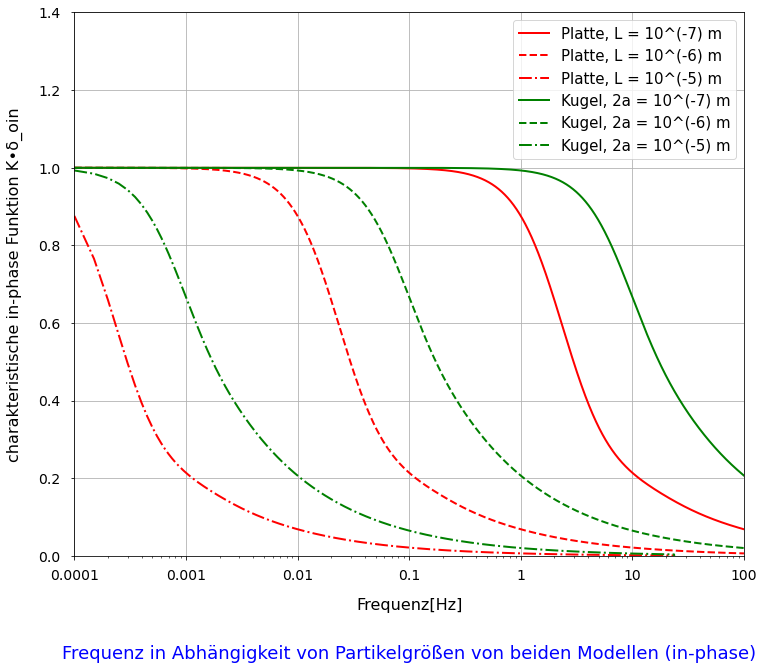

In [8]:
# die Funktion beschreibt Frequenz in Abhängigkeit von Partikelgrößen von beiden Modellen (in-phase)
# Die Funktion erwartet eine Liste von Partikelgrößen
def th_in_pg_1(list_L, list_a, D, f):
    labels = ['Platte, L = 10^(-7) m', 'Platte, L = 10^(-6) m', 'Platte, L = 10^(-5) m',
              'Kugel, 2a = 10^(-7) m', 'Kugel, 2a = 10^(-6) m', 'Kugel, 2a = 10^(-5) m']
    linestyle = ['-', '--', 'dashdot']
    plt.figure(figsize = (12,10))
    
    x = f
    p, k, y = list(), list(), list()
    for i in range(3):
        p.append(pl(list_L[i], D, f, K = 1))
        y.append(p[i].func_chara_1c())
        plt.plot(x, y[i], label = labels[i], linestyle = linestyle[i], linewidth = 2, color = 'r')
        
    for i in range(3):
        k.append(kl(list_a[i], D, f, K = 1))
        y.append(k[i].func_chara_3c())
        plt.plot(x, y[i+3], label = labels[i+3], linestyle = linestyle[i], linewidth = 2, color = 'g')

    plt.xlim(0.0001, 100),plt.ylim(0,1.4), plt.xscale('log'), plt.yscale('linear')
    plt.xticks([10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2], [0.0001,0.001,0.01,0.1,1,10,100], rotation = 0, fontsize = 14, y = -0.01)
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4], rotation = 0, fontsize = 14, x = -0.01)
    
    plt.ylabel('charakteristische in-phase Funktion K∙δ_oin', fontsize = 16, labelpad = 15)
    plt.xlabel('Frequenz[Hz]', fontsize = 16, labelpad = 15)
    plt.title("Frequenz in Abhängigkeit von Partikelgrößen von beiden Modellen (in-phase)",fontsize = 18, y = -0.2, color = 'b')
    
    plt.legend(loc = 1,fontsize = 15), plt.grid(True)

abb_in_pg = th_in_pg_1(list_L=[1e-7, 1e-6, 1e-5], list_a=[0.5e-7, 0.5e-6, 0.5e-5], D = 1.5e-14, f = np.linspace(0.0001, 100, num = 2000000))
abb_in_pg

#### **3.2 die charakteristische out-of-phase Funktion von beiden Modell abh. Partikelgrößen**

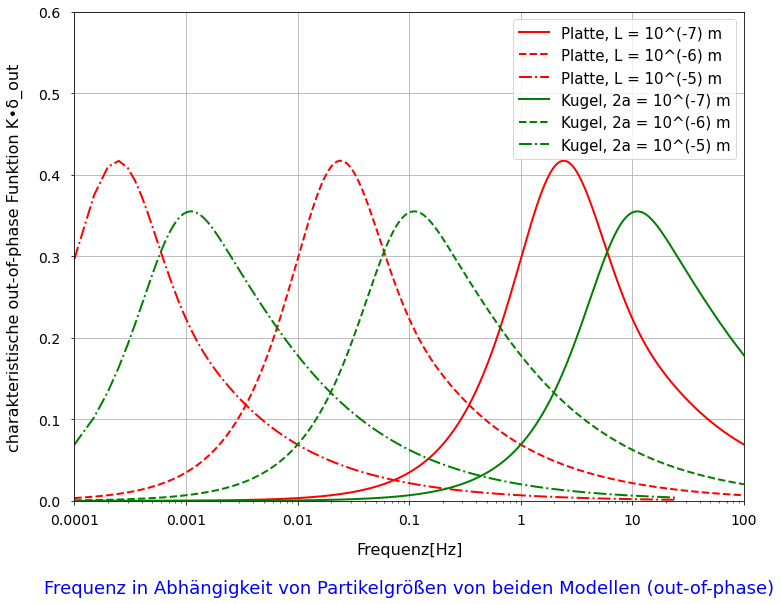

In [8]:
# die Funktion beschreibt Frequenz in Abhängigkeit von Partikelgrößen von beiden Modell (in-phase)
# Die Funktion erwartet eine Liste von Partikelgrößen
def th_out_pg_1(list_L, list_a, D, f):
    labels = ['Platte, L = 10^(-7) m', 'Platte, L = 10^(-6) m', 'Platte, L = 10^(-5) m',
              'Kugel, 2a = 10^(-7) m', 'Kugel, 2a = 10^(-6) m', 'Kugel, 2a = 10^(-5) m']
    linestyle = ['-', '--', 'dashdot']
    plt.figure(figsize = (12,9))
    
    x = f
    p, k, y = list(), list(), list()
    for i in range(3):
        p.append(pl(list_L[i], D, f, K = 1))
        y.append(p[i].func_chara_1s())
        plt.plot(x, y[i], label = labels[i], linestyle = linestyle[i], linewidth = 2, color = 'r')
        
    for i in range(3):
        k.append(kl(list_a[i], D, f, K = 1))
        y.append(k[i].func_chara_3s())
        plt.plot(x, y[i+3], label = labels[i+3], linestyle = linestyle[i], linewidth = 2, color = 'g')
    
    plt.xlim(0.0001, 100), plt.ylim(0,0.6), plt.xscale('log'), plt.yscale('linear')
    plt.xticks([10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2], [0.0001, 0.001,0.01,0.1,1,10,100], rotation = 0, fontsize = 14, y = -0.01)
    plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6], rotation = 0, fontsize = 14, x = -0.01)
    
    plt.ylabel('charakteristische out-of-phase Funktion K∙δ_out', fontsize = 16, labelpad = 15)
    plt.xlabel('Frequenz[Hz]', fontsize = 16, labelpad = 15)
    plt.title("Frequenz in Abhängigkeit von Partikelgrößen von beiden Modellen (out-of-phase)",fontsize = 18, y = -0.2, color = 'b')
    
    plt.legend(loc = 1,fontsize = 15), plt.grid(True)
    
abb_out_pg = th_out_pg_1(list_L=[1e-7, 1e-6, 1e-5], list_a=[0.5e-7, 0.5e-6, 0.5e-5], D = 1.5e-14, f = np.linspace(0.0001, 100, num = 2000000))
abb_out_pg

### **4. die charakteristische in-phase und out-of-phase Funktion von beiden Modellen abh. Parameter K**
+ **Initialisieren (Rees und Shen 1993)**
    + **Ebene Platte:**
        + **Dicke von der Platte: L = 10^-6 m**
        + **Diffusionskoeffizienten D = 1.5∙10^(−14) 𝑚^2/𝑠**
        + **K = [0.1, 0.8, 1.5]**
    + **Kugel:** 
        + **Partikeldurchmesser 2a = 10^-6 m**
        + **Diffusionskoeffizienten D = 1.5∙10^(−14) 𝑚^2/𝑠**
        + **K = [0.1, 0.8, 1.5]**

#### **4.1 die charakteristische in-phase Funktion von beiden Modellen abh. K**

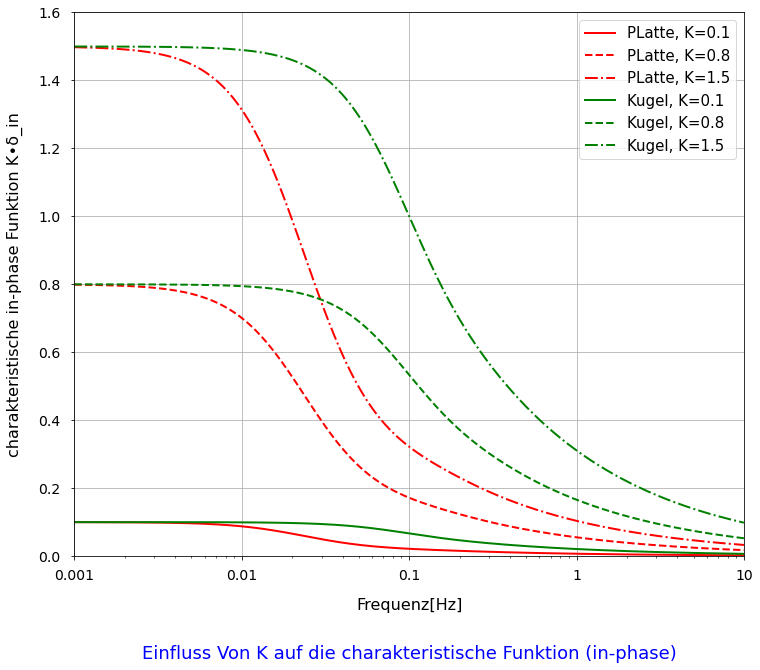

In [10]:
def th_in_K_1(L, a, D, f, list_K):
    labels = ['PLatte, K=0.1', 'PLatte, K=0.8', 'PLatte, K=1.5',
              'Kugel, K=0.1', 'Kugel, K=0.8', 'Kugel, K=1.5']
    linestyle = ['-', '--', 'dashdot']
    plt.figure(figsize = (12,10))
    
    x = f
    p, k, y = list(), list(), list()
    for i in range(3):
        p.append(pl(L, D, f, list_K[i]))
        y.append(p[i].func_chara_1c())
        plt.plot(x, y[i], label = labels[i], linestyle = linestyle[i], linewidth = 2, color = 'r')
        
    for i in range(3):
        k.append(kl(a, D, f, list_K[i]))
        y.append(k[i].func_chara_3c())
        plt.plot(x, y[i+3], label = labels[i+3], linestyle = linestyle[i], linewidth = 2, color = 'g')
    
    plt.xlim(0.001, 10), plt.ylim(0,1.6), plt.xscale('log'), plt.yscale('linear')
    plt.xticks([10**-3, 10**-2, 10**-1, 10**0, 10**1], [0.001,0.01,0.1,1,10], rotation = 0, fontsize = 14, y = -0.01)
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6], rotation = 0, fontsize = 14, x = -0.01)
    
    plt.ylabel('charakteristische in-phase Funktion K∙δ_in', fontsize = 16, labelpad = 15)
    plt.xlabel('Frequenz[Hz]', fontsize = 16, labelpad = 15)
    plt.title("Einfluss Von K auf die charakteristische Funktion (in-phase)",fontsize = 18, y = -0.2, color = 'b')
    
    plt.legend(loc = 1,fontsize = 15), plt.grid(True)
    
abb_in_K = th_in_K_1(L=1e-6, a=5e-7, D = 1.5e-14, f = np.linspace(0.001, 100, num = 1000000), list_K=[0.1, 0.8, 1.5])
abb_in_K

#### **4.2 die charakteristische out-of-phase Funktion von beiden Modell abh. K**

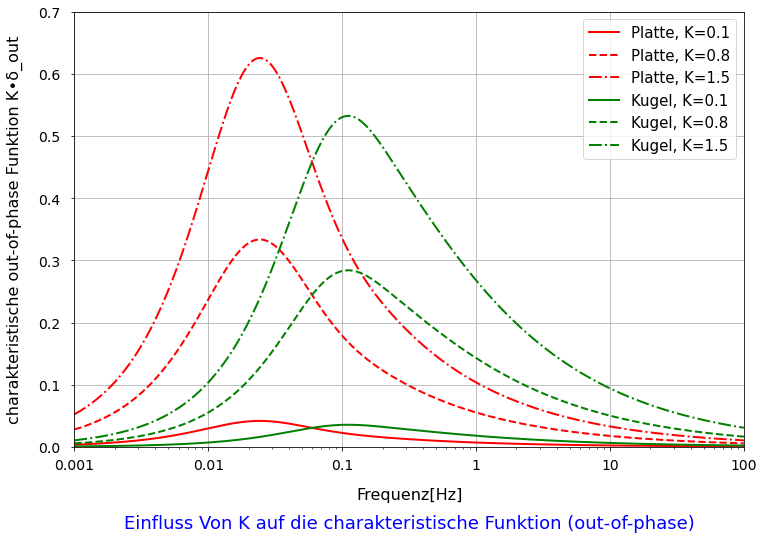

In [11]:
def th_out_K_1(L, a, D, f, list_K):
    labels = ['Platte, K=0.1', 'Platte, K=0.8', 'Platte, K=1.5',
              'Kugel, K=0.1', 'Kugel, K=0.8', 'Kugel, K=1.5']
    linestyle = ['-', '--', 'dashdot']
    plt.figure(figsize = (12,8))
    
    x = f
    p, k, y = list(), list(), list()
    for i in range(3):
        p.append(pl(L, D, f, list_K[i]))
        y.append(p[i].func_chara_1s())
        plt.plot(x, y[i], label = labels[i], linestyle = linestyle[i], linewidth = 2, color = 'r')
        
    for i in range(3):
        k.append(kl(a, D, f, list_K[i]))
        y.append(k[i].func_chara_3s())
        plt.plot(x, y[i+3], label = labels[i+3], linestyle = linestyle[i], linewidth = 2, color = 'g')
    
    plt.xlim(0.001, 10), plt.ylim(0,0.7), plt.xscale('log'), plt.yscale('linear')
    plt.xticks([10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2], [0.001,0.01,0.1,1,10,100], rotation = 0, fontsize = 14, y = -0.01)
    plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], rotation = 0, fontsize = 14, x = -0.01)
    
    plt.ylabel('charakteristische out-of-phase Funktion K∙δ_out', fontsize = 16, labelpad = 15)
    plt.xlabel('Frequenz[Hz]', fontsize = 16, labelpad = 15)
    plt.title("Einfluss Von K auf die charakteristische Funktion (out-of-phase)",fontsize = 18, y = -0.2, color = 'b')
    
    plt.legend(loc = 1,fontsize = 15), plt.grid(True)
    
abb_out_K = th_out_K_1(L=1e-6, a=5e-7, D = 1.5e-14, f = np.linspace(0.001, 100, num = 1000000), list_K=[0.1, 0.8, 1.5])
abb_out_K